In [86]:
import os 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
from glob import glob 
import json 

exp_list = [
# '/Volume/MoLeFlow/logs/baseline_v1.1_embed_dim_fix',
# '/Volume/MoLeFlow/logs/baseline_v1.1_embed_fix_jacobian_fix_no_ln_after_task0',
# '/Volume/MoLeFlow/logs/baseline_v1.2_embed_fix_jacobian_fix',
# '/Volume/MoLeFlow/logs/baseline_v1.3_embed_fix_jacobian_fix_soft_ln_init_scale_0.01',
# '/Volume/MoLeFlow/logs/baseline_v1.4_embed_fix_jacobian_fix_soft_ln_init_scale_0.01_lambda_logdet_1e-5',
# '/Volume/MoLeFlow/logs/baseline_v1.5_embed_fix_jacobian_fix_soft_ln_init_scale_0.01_lambda_logdet_1e-5_spatial_context_kernel_3',
# '/Volume/MoLeFlow/logs/baseline_v1.6_embed_fix_jacobian_fix_soft_ln_init_scale_0.01_scale_context_k3_a0.1',
# '/Volume/MoLeFlow/logs/baseline_v1.7_scale_context_k3_a0.1',
# '/Volume/MoLeFlow/logs/baseline_v1.8_patch_wise_context_gate_k3_hidden64',
# '/Volume/MoLeFlow/logs/moleflow_run_tests',
# '/Volume/MoLeFlow/logs/Version3-DIA_only',
# '/Volume/MoLeFlow/logs/Version3-OGP_only',
# '/Volume/MoLeFlow/logs/Version3-DIA_and_OGP',
# '/Volume/MoLeFlow/logs/Version3-All',
# '/Volume/MoLeFlow/logs/Version3-WhiteningAdapter_only',
# '/Volume/MoLeFlow/logs/Version3-MSContext_only',
# '/Volume/MoLeFlow/logs/Version3-WhiteningAdapter_DIA',
# '/Volume/MoLeFlow/logs/Version3-WhiteningAdapter_OGP',
# '/Volume/MoLeFlow/logs/Version3-WhiteningAdapter_DIA_OGP',
# '/Volume/MoLeFlow/logs/Version3-MSContext_DIA',
# '/Volume/MoLeFlow/logs/Version3-MSContext_OGP',
# '/Volume/MoLeFlow/logs/Version3-MSContext_DIA_OGP',
# '/Volume/MoLeFlow/logs/Version3-WhiteningAdapter_DIA_OGP_TaskConditionedMSContext',
# '/Volume/MoLeFlow/logs/Version4-CompleteSeparation',
# '/Volume/MoLeFlow/logs/Version4.1-CompleteSeparation',
# '/Volume/MoLeFlow/logs/Version4.2-ScoreAgg_topk10',
# '/Volume/MoLeFlow/logs/Version4.2-ScoreAgg_topk5',
'/Volume/MoLeFlow/logs/Version4.2-ScoreAgg_topk3',
# '/Volume/MoLeFlow/logs/Version4.3-ScoreAgg_topk3_no_ln',
# '/Volume/MoLeFlow/logs/Version4.4-whitening_no_ln',
# '/Volume/MoLeFlow/logs/Version4.2-ScoreAgg_topk3',
'/Volume/MoLeFlow/logs/Version5.1a-TailAwareLoss',
'/Volume/MoLeFlow/logs/Version5.1b-SpatialCluster',
'/Volume/MoLeFlow/logs/Version5.2a-SemanticProjector',
'/Volume/MoLeFlow/logs/Version5.3a-GlobalContext',
'/Volume/MoLeFlow/logs/Version5.5-Dir1-RelativePosition',
'/Volume/MoLeFlow/logs/Version5.5-Dir3-LocalConsistency',
'/Volume/MoLeFlow/logs/Version5.5-Dir1+Dir3-Combined',
'/Volume/MoLeFlow/logs/Version5.5-Dir2-DualBranch',
'/Volume/MoLeFlow/logs/Version5.6-ImprovedDualBranch',
'/Volume/MoLeFlow/logs/Version5.6-ScoreGuidedDual',
'/Volume/MoLeFlow/logs/Version5.6-MultiScaleConsistency',
'/Volume/MoLeFlow/logs/Version5.6-Combined',
'/Volume/MoLeFlow/logs/Version5.7-DirC-MultiOrientation',
'/Volume/MoLeFlow/logs/Version5.7-DirD-ContentBasedPE',
'/Volume/MoLeFlow/logs/Version5.7-DirE-HybridPE',
'/Volume/MoLeFlow/logs/Version5.7-Baseline-LocalConsistency',
'/Volume/MoLeFlow/logs/Version5.8-TAPE',
'/Volume/MoLeFlow/logs/Version5.8-TAPE-v2',
'/Volume/MoLeFlow/logs/Version5-Final-50epochs',
'/Volume/MoLeFlow/logs/Version5-Final-60epochs'

]

metrics = ['Image AUC', 'Pixel AUC', 'Image AP', 'Pixel AP']
df = pd.DataFrame()
for exp_path in exp_list:
    for log_path in glob(os.path.join(exp_path, 'final_results.csv')):
        temp_df = pd.read_csv(log_path)
        # metrics 컬럼을 float로 변환
        for m in metrics:
            if m in temp_df.columns:
                temp_df[m] = pd.to_numeric(temp_df[m], errors='coerce')
        temp_df['exp_name'] = os.path.basename(exp_path)
        df = pd.concat([df, temp_df], ignore_index=True)


In [87]:
# 클래스별(exp_name 별) 비교 - pivot 테이블로 각 Class별로 exp_name을 컬럼으로 비교 
if 'Class Name' in df.columns and 'exp_name' in df.columns:
    class_metric = 'Class Name'
    compare_metrics = ['Image AUC', 'Pixel AUC', 'Image AP', 'Pixel AP']
    # 피벗: index는 Class Name, columns는 exp_name, 값은 metric
    pivot = {}
    for m in compare_metrics:
        if m in df.columns:
            pt = df[df[class_metric]!=''].pivot_table(index=class_metric, columns='exp_name', values=m)
            pivot[m] = pt
    # 원하는 메트릭 하나 예시 출력 (여러개면 loop)
    for m, pt in pivot.items():
        display(pt.style.set_caption(m))

exp_name,Version4.2-ScoreAgg_topk3,Version5-Final-50epochs,Version5-Final-60epochs,Version5.1a-TailAwareLoss,Version5.1b-SpatialCluster,Version5.2a-SemanticProjector,Version5.3a-GlobalContext,Version5.5-Dir1+Dir3-Combined,Version5.5-Dir1-RelativePosition,Version5.5-Dir2-DualBranch,Version5.5-Dir3-LocalConsistency,Version5.6-Combined,Version5.6-ImprovedDualBranch,Version5.6-MultiScaleConsistency,Version5.6-ScoreGuidedDual,Version5.7-Baseline-LocalConsistency,Version5.7-DirC-MultiOrientation,Version5.7-DirD-ContentBasedPE,Version5.7-DirE-HybridPE,Version5.8-TAPE,Version5.8-TAPE-v2
Class Name,,,,,,,,,,,,,,,,,,,,,
grid,0.895600,0.938200,0.941500,0.923100,0.853000,0.900600,0.887200,0.843800,0.866300,0.345000,0.915600,0.435300,0.401800,0.919800,0.487900,0.915600,0.915600,0.848800,0.837900,0.936500,0.916500
leather,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.172600,1.000000,0.118500,0.474900,1.000000,0.138600,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
screw,nan,0.412000,0.442500,0.407500,0.441700,0.442900,0.437600,0.397400,0.387800,0.914100,0.426300,0.902200,0.896500,0.390000,0.900200,0.426300,0.427100,0.410500,0.399100,0.390000,0.375300
transistor,0.775400,0.817100,0.823700,0.799200,0.759200,0.777900,0.775400,0.767900,0.757100,0.517900,0.807900,0.542100,0.603300,0.810000,0.572100,0.807900,0.807900,0.758700,0.753300,0.808700,0.796300


exp_name,Version4.2-ScoreAgg_topk3,Version5-Final-50epochs,Version5-Final-60epochs,Version5.1a-TailAwareLoss,Version5.1b-SpatialCluster,Version5.2a-SemanticProjector,Version5.3a-GlobalContext,Version5.5-Dir1+Dir3-Combined,Version5.5-Dir1-RelativePosition,Version5.5-Dir2-DualBranch,Version5.5-Dir3-LocalConsistency,Version5.6-Combined,Version5.6-ImprovedDualBranch,Version5.6-MultiScaleConsistency,Version5.6-ScoreGuidedDual,Version5.7-Baseline-LocalConsistency,Version5.7-DirC-MultiOrientation,Version5.7-DirD-ContentBasedPE,Version5.7-DirE-HybridPE,Version5.8-TAPE,Version5.8-TAPE-v2
Class Name,,,,,,,,,,,,,,,,,,,,,
grid,0.908200,0.903500,0.908200,0.900900,0.908200,0.908100,0.906900,0.883700,0.872500,0.512600,0.898700,0.576200,0.542200,0.900800,0.728400,0.898700,0.898700,0.882800,0.870400,0.904100,0.899400
leather,0.972000,0.969000,0.967800,0.970400,0.972000,0.967700,0.963100,0.976600,0.977700,0.379100,0.967700,0.432100,0.718400,0.968800,0.523200,0.967700,0.967700,0.980900,0.977800,0.962800,0.960600
screw,nan,0.841700,0.849600,0.827600,0.850300,0.851400,0.848800,0.872600,0.866000,0.115800,0.827500,0.131000,0.127600,0.827200,0.140900,0.827500,0.827500,0.890800,0.902600,0.804900,0.799900
transistor,0.927000,0.938700,0.939800,0.938300,0.927000,0.926900,0.925300,0.890000,0.890100,0.581900,0.939300,0.727600,0.756900,0.939900,0.765600,0.939300,0.939300,0.912600,0.900800,0.940900,0.946900


exp_name,Version4.2-ScoreAgg_topk3,Version5-Final-50epochs,Version5-Final-60epochs,Version5.1a-TailAwareLoss,Version5.1b-SpatialCluster,Version5.2a-SemanticProjector,Version5.3a-GlobalContext,Version5.5-Dir1+Dir3-Combined,Version5.5-Dir1-RelativePosition,Version5.5-Dir2-DualBranch,Version5.5-Dir3-LocalConsistency,Version5.6-Combined,Version5.6-ImprovedDualBranch,Version5.6-MultiScaleConsistency,Version5.6-ScoreGuidedDual,Version5.7-Baseline-LocalConsistency,Version5.7-DirC-MultiOrientation,Version5.7-DirD-ContentBasedPE,Version5.7-DirE-HybridPE,Version5.8-TAPE,Version5.8-TAPE-v2
Class Name,,,,,,,,,,,,,,,,,,,,,
grid,0.962600,0.978500,0.980100,0.973500,0.946800,0.964900,0.959500,0.935600,0.947400,0.647400,0.970200,0.700800,0.667200,0.971300,0.749300,0.970200,0.970200,0.940400,0.934500,0.978200,0.971800
leather,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.606400,1.000000,0.570900,0.796600,1.000000,0.576100,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
screw,nan,0.731800,0.752500,0.740200,0.734500,0.744100,0.726600,0.739500,0.728900,0.969000,0.745600,0.963500,0.959500,0.722700,0.963400,0.745600,0.746200,0.741900,0.737200,0.730500,0.722700
transistor,0.740800,0.805300,0.817400,0.784000,0.711900,0.750500,0.730700,0.727300,0.710100,0.388900,0.800800,0.457900,0.535600,0.796700,0.544100,0.800800,0.799000,0.725200,0.713900,0.800500,0.789500


exp_name,Version4.2-ScoreAgg_topk3,Version5-Final-50epochs,Version5-Final-60epochs,Version5.1a-TailAwareLoss,Version5.1b-SpatialCluster,Version5.2a-SemanticProjector,Version5.3a-GlobalContext,Version5.5-Dir1+Dir3-Combined,Version5.5-Dir1-RelativePosition,Version5.5-Dir2-DualBranch,Version5.5-Dir3-LocalConsistency,Version5.6-Combined,Version5.6-ImprovedDualBranch,Version5.6-MultiScaleConsistency,Version5.6-ScoreGuidedDual,Version5.7-Baseline-LocalConsistency,Version5.7-DirC-MultiOrientation,Version5.7-DirD-ContentBasedPE,Version5.7-DirE-HybridPE,Version5.8-TAPE,Version5.8-TAPE-v2
Class Name,,,,,,,,,,,,,,,,,,,,,
grid,0.149400,0.140900,0.150100,0.147200,0.149400,0.160600,0.139900,0.138500,0.144400,0.006900,0.132900,0.009000,0.007300,0.131800,0.032000,0.132900,0.132900,0.125100,0.118900,0.148400,0.148800
leather,0.189900,0.175900,0.172700,0.180000,0.189900,0.195300,0.165200,0.176100,0.169200,0.004700,0.178200,0.005300,0.049600,0.183600,0.009400,0.178200,0.178200,0.230200,0.169200,0.159000,0.161000
screw,nan,0.021500,0.024800,0.021700,0.021300,0.020100,0.020600,0.020500,0.016400,0.001300,0.021600,0.001400,0.001400,0.022100,0.001400,0.021600,0.021600,0.023100,0.026600,0.019100,0.018000
transistor,0.521400,0.599100,0.610400,0.588300,0.521400,0.538400,0.519700,0.453300,0.442900,0.075100,0.600100,0.157300,0.167600,0.608000,0.199700,0.600100,0.600000,0.442800,0.423400,0.603300,0.649900


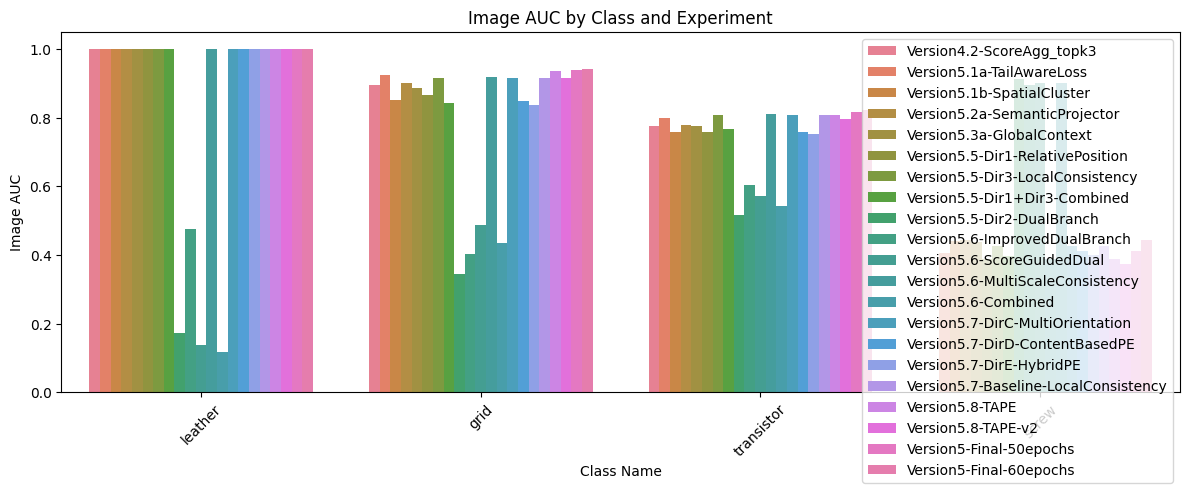

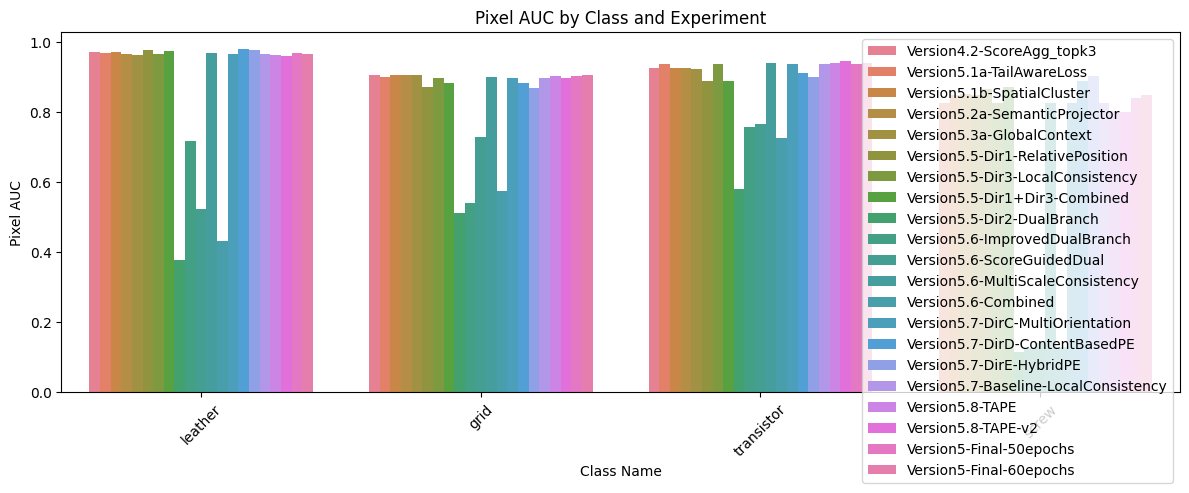

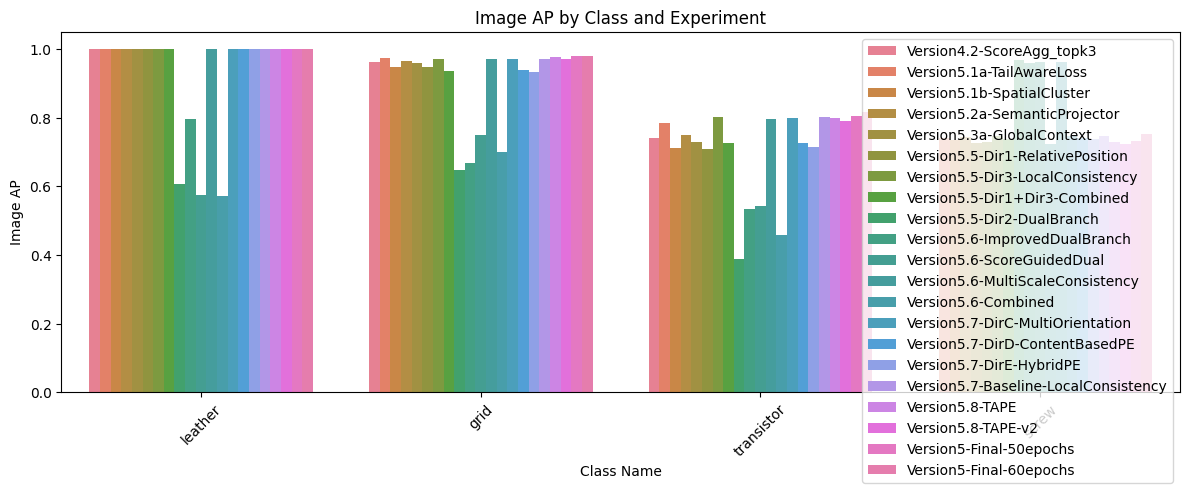

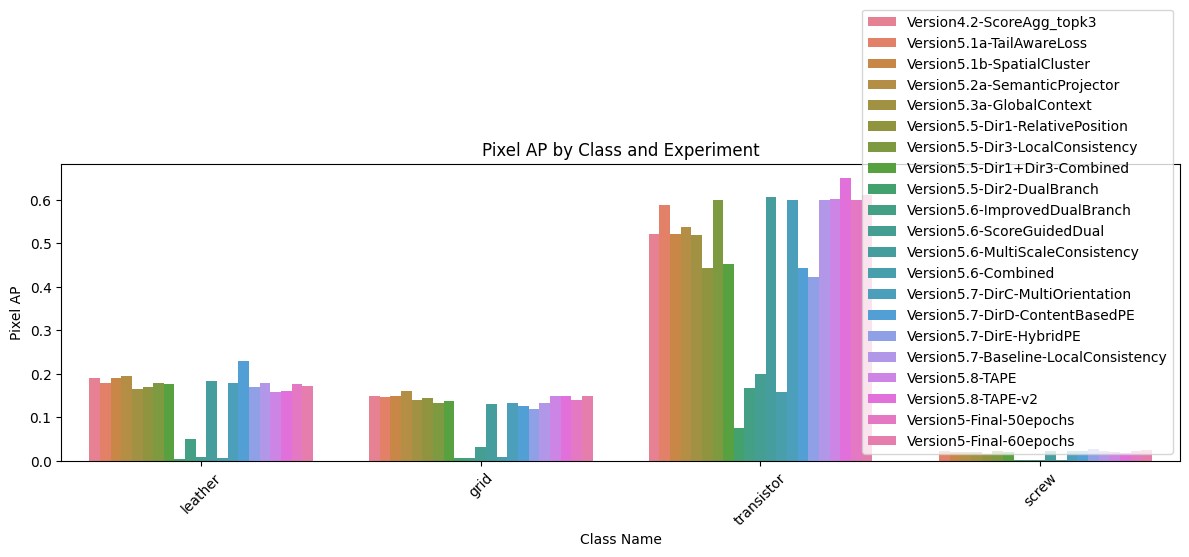

In [88]:
# 클래스별(exp_name 별) 비교 - bar plot으로 각 Class별 exp_name 시각화
import matplotlib.pyplot as plt
import seaborn as sns

if 'Class Name' in df.columns and 'exp_name' in df.columns:
    class_metric = 'Class Name'
    compare_metrics = ['Image AUC', 'Pixel AUC', 'Image AP', 'Pixel AP']
    for m in compare_metrics:
        if m in df.columns:
            plot_df = df[df[class_metric]!=''][[class_metric, 'exp_name', m]].dropna()
            plt.figure(figsize=(12, 5))
            sns.barplot(
                data=plot_df,
                x=class_metric, y=m, hue='exp_name'
            )
            plt.title(f'{m} by Class and Experiment')
            plt.xticks(rotation=45)
            plt.tight_layout()
            plt.legend(loc='best')
            plt.show()

In [89]:
# The error is due to non-unique index, so we must reset the index for Styler to work.
df[df['Task ID']=='Mean'].reset_index(drop=True).style.set_properties(
    subset=['exp_name'], **{'max-width': '600px', 'white-space': 'pre-wrap'}
)

,Task ID,Class Name,Routing Acc (%),Image AUC,Pixel AUC,Image AP,Pixel AP,exp_name
0,Mean,Overall,100.000000,nan,nan,nan,nan,Version4.2-ScoreAgg_topk3
1,Mean,Overall,100.000000,nan,nan,nan,nan,Version5.1a-TailAwareLoss
2,Mean,Overall,100.000000,nan,nan,nan,nan,Version5.1b-SpatialCluster
3,Mean,Overall,100.000000,nan,nan,nan,nan,Version5.2a-SemanticProjector
4,Mean,Overall,100.000000,nan,nan,nan,nan,Version5.3a-GlobalContext
5,Mean,Overall,100.000000,nan,nan,nan,nan,Version5.5-Dir1-RelativePosition
6,Mean,Overall,100.000000,nan,nan,nan,nan,Version5.5-Dir3-LocalConsistency
7,Mean,Overall,100.000000,nan,nan,nan,nan,Version5.5-Dir1+Dir3-Combined
8,Mean,Overall,100.000000,nan,nan,nan,nan,Version5.5-Dir2-DualBranch
9,Mean,Overall,100.000000,nan,nan,nan,nan,Version5.6-ImprovedDualBranch


In [90]:
# The error is due to non-unique index, so we must reset the index for Styler to work.
df[(df['Task ID']=='Mean')&(df['exp_name'].apply(lambda x : 'WhiteningAdapter' in x))].reset_index(drop=True).style.set_properties(
    subset=['exp_name'], **{'max-width': '600px', 'white-space': 'pre-wrap'}
)

,Task ID,Class Name,Routing Acc (%),Image AUC,Pixel AUC,Image AP,Pixel AP,exp_name


# All classes

In [91]:
import os 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
from glob import glob 
import json 

# 왜 glob에 결과가 없어?
exp_list = [
    '/Volume/MoLeFlow/logs/Version4.3-ScoreAgg_topk3_all_classes_alphabet_order',
    '/Volume/MoLeFlow/logs/Version5.7-DirC-MultiOrientation_all_classes',
    '/Volume/MoLeFlow/logs/Version5-Final-all_classes'
]

df = pd.DataFrame()

for exp_path in exp_list:
    search_path = os.path.join(exp_path, 'final_results.csv')
    found_files = glob(search_path)    
    for log_path in found_files:
        temp_df = pd.read_csv(log_path)
        temp_df['exp_name'] = os.path.basename(exp_path)
        df = pd.concat([df, temp_df])



In [92]:
# 'Class Name'이 'screw'와 'Overall'이 아닌 행들만 남긴 뒤,
# exp_name별로 Image AUC, Pixel AUC, Image AP, Pixel AP의 평균을 계산합니다.
metrics = ['Image AUC', 'Pixel AUC', 'Image AP', 'Pixel AP']
df_filtered = df[(df['Class Name'] != 'screw') & (df['Class Name'] != 'Overall')].copy()
for m in metrics:
    df_filtered[m] = pd.to_numeric(df_filtered[m], errors='coerce')
df_exp_mean = df_filtered.groupby('exp_name')[metrics].mean().reset_index()


In [93]:
df

,Task ID,Class Name,Routing Acc (%),Image AUC,Pixel AUC,Image AP,Pixel AP,exp_name
0,0,bottle,100.00,1.0000,0.9449,1.0000,0.4211,Version4.3-ScoreAgg_topk3_all_classes_alphabet...
1,1,cable,100.00,0.8681,0.9075,0.9216,0.4246,Version4.3-ScoreAgg_topk3_all_classes_alphabet...
2,2,capsule,100.00,0.6621,0.9296,0.9002,0.1096,Version4.3-ScoreAgg_topk3_all_classes_alphabet...
3,3,carpet,100.00,0.9699,0.9596,0.9916,0.4192,Version4.3-ScoreAgg_topk3_all_classes_alphabet...
4,4,grid,100.00,0.8655,0.9017,0.9478,0.1474,Version4.3-ScoreAgg_topk3_all_classes_alphabet...
5,5,hazelnut,100.00,0.9486,0.9656,0.9674,0.3352,Version4.3-ScoreAgg_topk3_all_classes_alphabet...
6,6,leather,100.00,1.0000,0.9769,1.0000,0.2313,Version4.3-ScoreAgg_topk3_all_classes_alphabet...
7,7,metal_nut,100.00,0.9614,0.9718,0.9915,0.8023,Version4.3-ScoreAgg_topk3_all_classes_alphabet...
8,8,pill,98.80,0.8451,0.9486,0.9675,0.3613,Version4.3-ScoreAgg_topk3_all_classes_alphabet...
9,9,screw,100.00,0.4480,0.8442,0.7542,0.0194,Version4.3-ScoreAgg_topk3_all_classes_alphabet...


In [94]:
df_exp_mean

,exp_name,Image AUC,Pixel AUC,Image AP,Pixel AP
0,Version4.3-ScoreAgg_topk3_all_classes_alphabet...,0.897150,0.929614,0.949393,0.359507
1,Version5-Final-all_classes,0.916671,0.928357,0.959950,0.363864
2,Version5.7-DirC-MultiOrientation_all_classes,0.916479,0.927393,0.961500,0.355664
